In [1]:
import numpy as np
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline

# 5.1 1차원 이산형 확률변수

In [2]:
x_set = np.array([1,2,3,4,5,6])

In [3]:
def f(x):
    if x in x_set:
        return x/21
    else:
        return 0

In [4]:
X = [x_set, f]

In [5]:
prob = np.array([f(x_k) for x_k in x_set])

dict(zip(x_set, prob))

{1: 0.047619047619047616,
 2: 0.09523809523809523,
 3: 0.14285714285714285,
 4: 0.19047619047619047,
 5: 0.23809523809523808,
 6: 0.2857142857142857}

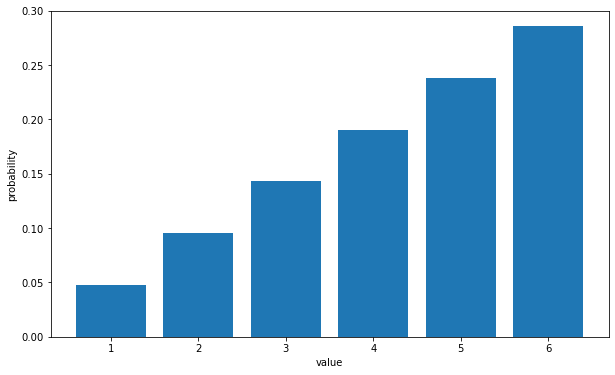

In [6]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.bar(x_set, prob)
ax.set_xlabel('value')
ax.set_ylabel('probability')

plt.show()

In [7]:
np.all(prob>=0)

True

In [8]:
np.sum(prob)

0.9999999999999999

In [9]:
def F(x):
    return np.sum(f(x_k) for x_k in x_set if x_k<=x)

In [10]:
F(3)

C:\Users\USER\AppData\Local\Temp/ipykernel_385436/344673048.py:2: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(f(x_k) for x_k in x_set if x_k<=x)


0.2857142857142857

In [11]:
y_set = np.array([2*x_k + 3 for x_k in x_set])
prob = np.array([f(x_k) for x_k in x_set])
dict(zip(y_set, prob))

{5: 0.047619047619047616,
 7: 0.09523809523809523,
 9: 0.14285714285714285,
 11: 0.19047619047619047,
 13: 0.23809523809523808,
 15: 0.2857142857142857}

In [12]:
np.sum([x_k * f(x_k) for x_k in x_set])

4.333333333333333

In [13]:
sample = np.random.choice(x_set, int(1e6), p=prob)
np.mean(sample)

4.33306

In [14]:
def E(X, g=lambda x: x):
    x_set, f=X
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])

In [15]:
E(X)

4.333333333333333

In [16]:
E(X, g=lambda x: 2*x + 3)

11.666666666666664

In [17]:
2*E(X) +3

11.666666666666666

In [20]:
mean = E(X)
np.sum([(x_k-mean)**2 * f(x_k) for x_k in x_set])

2.2222222222222223

In [21]:
def V(X, g=lambda x: x):
    x_set, f = X
    mean = E(X, g)
    return np.sum([(g(x_k)-mean)**2 * f(x_k) for x_k in x_set])

In [22]:
V(X)

2.2222222222222223

In [23]:
V(X, g=lambda x: 2*x +3)

8.88888888888889

In [24]:
2**2 * V(X)

8.88888888888889

# 5.2 2차원 이산형 확률변수

In [25]:
x_set = np.arange(2, 13)
y_set = np.arange(1,7)

In [26]:
def f_XY(x, y):
    if 1 <= y <= 6 and 1 <= x-y <=6:
        return y * (x-y) / 441
    else:
        return 0

In [27]:
XY = [x_set, y_set, f_XY]

In [29]:
prob = np.array([[f_XY(x_i, y_j) for y_j in y_set] for x_i in x_set])

In [30]:
prob

array([[0.002, 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.005, 0.005, 0.   , 0.   , 0.   , 0.   ],
       [0.007, 0.009, 0.007, 0.   , 0.   , 0.   ],
       [0.009, 0.014, 0.014, 0.009, 0.   , 0.   ],
       [0.011, 0.018, 0.02 , 0.018, 0.011, 0.   ],
       [0.014, 0.023, 0.027, 0.027, 0.023, 0.014],
       [0.   , 0.027, 0.034, 0.036, 0.034, 0.027],
       [0.   , 0.   , 0.041, 0.045, 0.045, 0.041],
       [0.   , 0.   , 0.   , 0.054, 0.057, 0.054],
       [0.   , 0.   , 0.   , 0.   , 0.068, 0.068],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.082]])

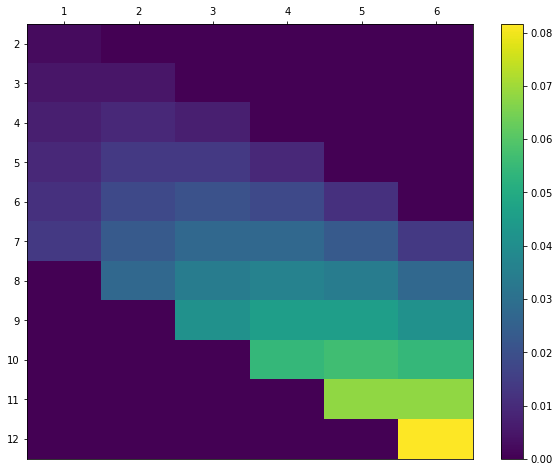

In [31]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

c = ax.pcolor(prob)
ax.set_xticks(np.arange(prob.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(prob.shape[0]) + 0.5, minor=False)
ax.set_xticklabels(np.arange(1, 7), minor=False)
ax.set_yticklabels(np.arange(2, 13), minor=False)

ax.invert_yaxis()

ax.xaxis.tick_top()
fig.colorbar(c, ax=ax)
plt.show()

In [32]:
np.all(prob>=0)

True

In [33]:
np.sum(prob)

1.0

In [34]:
def f_X(x):
    return np.sum([f_XY(x, y_k) for y_k in y_set])

In [36]:
def f_Y(y):
    return np.sum([f_XY(x_k, y) for x_k in x_set])

In [37]:
X = [x_set, f_X]
Y = [y_set, f_Y]

In [40]:
prob_x = np.array([f_X(x_k) for x_k in x_set])
prob_y = np.array([f_Y(y_k) for y_k in y_set])

In [39]:
prob_x

array([0.002, 0.009, 0.023, 0.045, 0.079, 0.127, 0.159, 0.172, 0.166,
       0.136, 0.082])

In [41]:
prob_y

array([0.048, 0.095, 0.143, 0.19 , 0.238, 0.286])

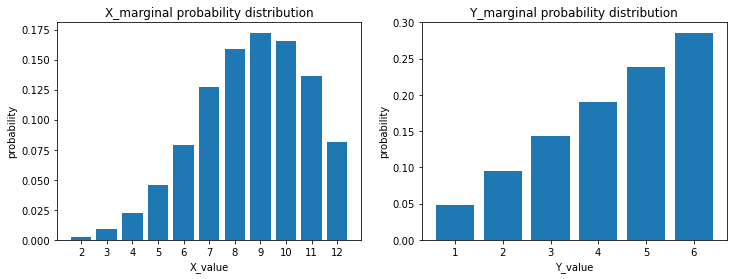

In [42]:
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.bar(x_set, prob_x)
ax1.set_title('X_marginal probability distribution')
ax1.set_xlabel('X_value')
ax1.set_ylabel('probability')
ax1.set_xticks(x_set)

ax2.bar(y_set, prob_y)
ax2.set_title('Y_marginal probability distribution')
ax2.set_xlabel('Y_value')
ax2.set_ylabel('probability')

plt.show()

In [43]:
np.sum([x_i * f_XY(x_i, y_j) for x_i in x_set for y_j in y_set])

8.666666666666666

In [44]:
def E(XY, g):
    x_set, y_set, f_XY = XY
    return np.sum([g(x_i, y_j) * f_XY(x_i, y_j)
                   for x_i in x_set for y_j in y_set])

In [45]:
mean_X=E(XY, lambda x, y: x)

In [46]:
mean_X

8.666666666666666

In [47]:
mean_Y=E(XY, lambda x, y: y)

In [48]:
mean_Y

4.333333333333333

In [49]:
a, b = 2, 3

In [50]:
E(XY, lambda x, y: a*x + b*y)

30.333333333333332

In [51]:
a*mean_X + b* mean_Y

30.333333333333332

In [52]:
np.sum([(x_i-mean_X)**2 * f_XY(x_i, y_j)
        for x_i in x_set for y_j in y_set])

4.444444444444444

In [53]:
def V(XY, g):
    x_set, y_set, f_XY = XY
    mean = E(XY, g)
    return np.sum([(g(x_i, y_j)-mean)**2 * f_XY(x_i, y_j)
                   for x_i in x_set for y_j in y_set])

In [54]:
var_X = V(XY, g=lambda x, y: x)
var_X

4.444444444444444

In [55]:
var_Y = V(XY, g=lambda x, y: y)
var_Y

2.2222222222222223

In [56]:
def Cov(XY):
    x_set, y_set, f_XY = XY
    mean_X = E(XY, lambda x, y: x)
    mean_Y = E(XY, lambda x, y: y)
    return np.sum([(x_i-mean_X) * (y_j-mean_Y) * f_XY(x_i, y_j)
                   for x_i in x_set for y_j in y_set])

In [57]:
cov_xy = Cov(XY)

In [58]:
cov_xy

2.222222222222222

In [59]:
V(XY, lambda x, y: a*x + b*y)

64.44444444444444

In [61]:
a**2 * var_X + b**2 * var_Y +2*a*b*cov_xy

64.44444444444443

In [62]:
cov_xy / np.sqrt(var_X*var_Y)

0.7071067811865474